# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.11.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =40)

## Part 2 - Building the ANN

### Initializing the ANN

In [14]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the second hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

### Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [19]:
ann.fit(X_train, y_train, batch_size = 32 , validation_data=(X_test,y_test) , epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7524 - val_loss: 0.4428 - val_accuracy: 0.8085
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8044 - val_loss: 0.4142 - val_accuracy: 0.8170
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8115 - val_loss: 0.4015 - val_accuracy: 0.8235
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8179 - val_loss: 0.3906 - val_accuracy: 0.8265
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8279 - val_loss: 0.3730 - val_accuracy: 0.8400
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8371 - val_loss: 0.3617 - val_accuracy: 0.8490
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3747 - accuracy: 0.8418 - val_loss: 0.3507 - val_accuracy: 0.8550

Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8604 - val_loss: 0.3212 - val_accuracy: 0.8710
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8606 - val_loss: 0.3220 - val_accuracy: 0.8690
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8609 - val_loss: 0.3226 - val_accuracy: 0.8680
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8601 - val_loss: 0.3213 - val_accuracy: 0.8700
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8624 - val_loss: 0.3218 - val_accuracy: 0.8685
Epoch 63/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8610 - val_loss: 0.3229 - val_accuracy: 0.8710
Epoch 64/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8604 - val_loss: 0.3215 - val_accuracy:

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [25]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Making the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1527   89]
 [ 176  208]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1616
           1       0.70      0.54      0.61       384

    accuracy                           0.87      2000
   macro avg       0.80      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



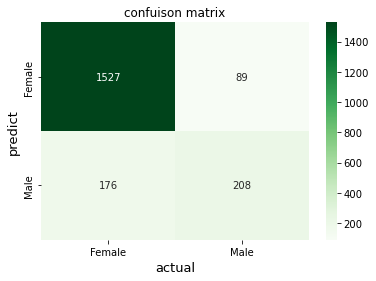

In [23]:
sns.heatmap(cm,annot=True,
           fmt='g',
            cmap='Greens',
            xticklabels=['Female','Male'],
            yticklabels=['Female','Male'] )
plt.ylabel('predict',fontsize=13)
plt.xlabel('actual',fontsize=13)
plt.title("confuison matrix")
plt.show()      